In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import numpy as np
import qutip as qt 
from CD_control_optimization.batch_optimizer import BatchOptimizer
from CD_control_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from CD_control_optimization.optimization_sweeps import OptimizationSweeps
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.3.0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3266226566643065922,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 854903612726365881
 physical_device_desc: "device: XLA_CPU device"]

In [2]:
#first, the optimization options.
N = 50 #hilbert space size
alpha_cat = 2 + 1j #desired cat alpha
params = {
'N_blocks' : 6, #number of blocks in circuit
'N_multistart' : 10, #number of optimizations to run in parallel
'epochs' : 20, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.99, #terminal fidelitiy
'use_displacements' : False, #use D operators in optimization
'no_CD_end' : False, #set final CD = 0
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'alpha_scale' : 0.5, #maximum |alpha| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))],
'target_states' : [qt.tensor(qt.basis(2,0), (qt.coherent(N,alpha_cat) + qt.coherent(N,-alpha_cat)).unit())],
'name' : 'Cat creation', #name for printing and saving
'filename' : None, 
#if no filename specified, will be saved in this folder with default name #"name.h5" 
'alpha_cat' : alpha_cat, #note: can pass arbitrary parameters, will be saved
}


In [3]:
#create optimization object. 
#Note that initial params will be randomized upon creation
opt = BatchOptimizer(**params)

In [4]:
#print current info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cat creation
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [ 2.68796-0.1274j  -1.06831+1.2645j  -0.30048+0.02417j  1.98112+1.71575j
  0.00319-0.15453j -0.73195+1.25808j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.       173.95674   88.38665   66.67582 -153.79088 -161.36754]
thetas (deg):  [  67.47807 -143.23991  173.69359  115.26438  -79.4808  -101.95865]
Max Fidelity:  0.123310




In [5]:
#run optimizer.
opt.optimize()
#note that every time an optimizer is run, it will add to the same .h5 file in the filename, saving the data with a new timestamp

Start time: 2020-10-26 05:56:31
 Epoch: 15 / 20 Max Fid: 0.994908 Avg Fid: 0.814632 Max dFid: 0.087903 Avg dFid: 0.016525 Elapsed time: 0:00:09.644923 Remaing time: 0:00:03.214974

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 6
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cat creation
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [-0.95263-0.4819j  -2.77179-1.40909j  0.58241+0.59629j  0.15727+0.8678j
 -0.2505 +0.83966j  0.04562-0.04485j]
alphas:        [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [   0.       121.39767   17.92076   -6.32516  187.13074 -100.90529]
thetas (deg):  [-89.27714 181.06555 -57.54129 -40.7351  -31.66821 -96.1003 ]
Max Fidelity:  0.995400


all data saved as: Cat creation.h5
termination reason: term_fid
optimiz

'2020-10-26 05:56:31'

In [6]:
#now, we can analyze the results.
#note that all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I would recommend using "HDFview" software to understand data structure
filename = opt.filename
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 6
N_cav: 50
N_multistart: 10
alpha_cat: (2+1j)
alpha_scale: 0.5
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 9.644923210144043
epoch_size: 10
epochs: 20
learning_rate: 0.01
name: Cat creation
no_CD_end: False
optimization_type: state transfer
term_fid: 0.99
termination_reason: term_fid
use_displacements: False
filename: Cat creation.h5

Best circuit parameters found:
betas:         [-0.95263-0.4819j  -2.77179-1.40909j  0.58241+0.59629j  0.15727+0.8678j
 -0.2505 +0.83966j  0.04562-0.04485j]
alphas:        [-0.95263-0.4819j  -2.77179-1.40909j  0.58241+0.59629j  0.15727+0.8678j
 -0.2505 +0.83966j  0.04562-0.04485j]
phis (deg):    [ -54.58143-27.61056j -158.81178-80.7348j    33.3698 +34.16511j
    9.01119+49.72099j  -14.35276+48.10915j    2.614   -2.56988j]
thetas (deg):  [ -54.58143-27.61056j -158.81178-80.7348j    33.3698 +34.16511j
    9.01119+49.72099j  -14.35276+48.10915j    2.614   -2.56988j]
Max Fidelity:  0.994908




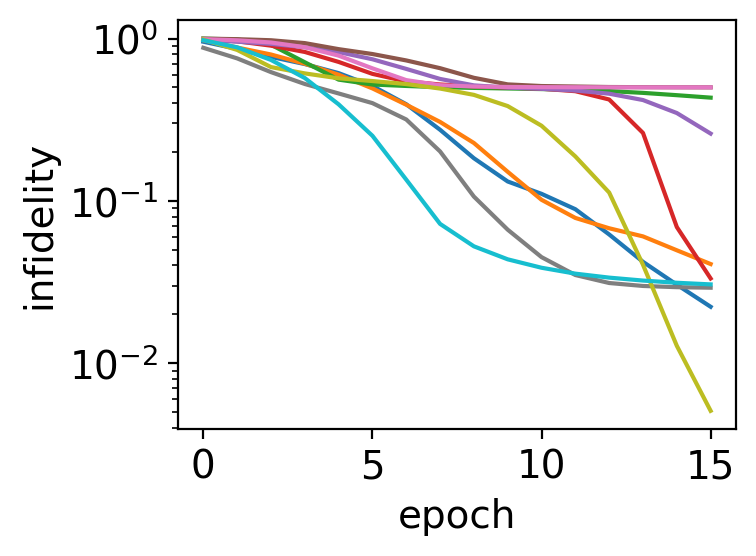

In [7]:
#We can plot the trajectories of the different parallel optimizations
analysis.plot_fidelities()

In [8]:
#We can also load the best circuit, states, and other parameters (see OptimizationAnalysis class)
best_circuit = analysis.best_circuit()
print(best_circuit)
target_state = analysis.target_state()
print(target_state)

{'fidelity': 0.99490845, 'betas': array([-0.9526257 -0.48189518j, -2.7717886 -1.4090881j ,
        0.58241296+0.5962936j ,  0.15727496+0.86779505j,
       -0.25050294+0.8396631j ,  0.04562299-0.04485286j], dtype=complex64), 'alphas': array([-0.9526257 -0.48189518j, -2.7717886 -1.4090881j ,
        0.58241296+0.5962936j ,  0.15727496+0.86779505j,
       -0.25050294+0.8396631j ,  0.04562299-0.04485286j], dtype=complex64), 'phis': array([-0.9526257 -0.48189518j, -2.7717886 -1.4090881j ,
        0.58241296+0.5962936j ,  0.15727496+0.86779505j,
       -0.25050294+0.8396631j ,  0.04562299-0.04485286j], dtype=complex64), 'thetas': array([-0.9526257 -0.48189518j, -2.7717886 -1.4090881j ,
        0.58241296+0.5962936j ,  0.15727496+0.86779505j,
       -0.25050294+0.8396631j ,  0.04562299-0.04485286j], dtype=complex64)}
Quantum object: dims = [[2, 50], [1, 1]], shape = (100, 1), type = ket
Qobj data =
[[ 1.16083086e-01+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j]
 [ 2.46249408e-01+3.28332

In [9]:
#Now, using the same opt object, we can sweep the number of blocks in the optimization.
sweeper = OptimizationSweeps(opt_object=opt)
sweeper.N_blocks_sweep(min_N_blocks=3, max_N_blocks=6, terminate=True) #"terminate" option specifies if it terminates sweep when term fid is met


starting N blocks sweep

N_blocks: 3
N blocks sweep filename: Cat creation.h5
N blocks sweep name: sweep N_blocks 2020-10-26 05:57:06

Start time: 2020-10-26 05:57:06
 Epoch: 20 / 20 Max Fid: 0.970835 Avg Fid: 0.664505 Max dFid: 0.004345 Avg dFid: 0.000918 Elapsed time: 0:00:07.704336 Remaing time: 0:00:00.386485

Optimization stopped.  Reached maximum number of epochs. Terminal fidelity not reached.

optimization_type: state transfer
N_multistart: 10
N_blocks: 3
term_fid: 0.99
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 20
beta_scale: 3.0
alpha_scale: 0.5
use_displacements: False
name: Cat creation
comment: 
alpha_cat: (2+1j)
N_cav: 50
filename: Cat creation.h5

Best circuit parameters found:
betas:         [4.01712+2.00805j 0.14918-0.29887j 0.00764-0.03077j]
alphas:        [0.+0.j 0.+0.j 0.+0.j]
phis (deg):    [  0.      -81.57085 171.60112]
thetas (deg):  [-90.07852 -90.01942  89.68209]
Max Fidelity:  0.970852


all data saved as: Cat creation.h5
te

'sweep N_blocks 2020-10-26 05:57:06'

In [10]:
#the sweep data will be nicely saved to the same h5 file. We can analyze the sweep with the sweep analysis class.
sweep_analysis = OptimizationSweepsAnalysis(filename=filename)
sweep_analysis.sweep_names #names of the sweeps it found in the file

['sweep N_blocks 2020-10-26 05:57:06']

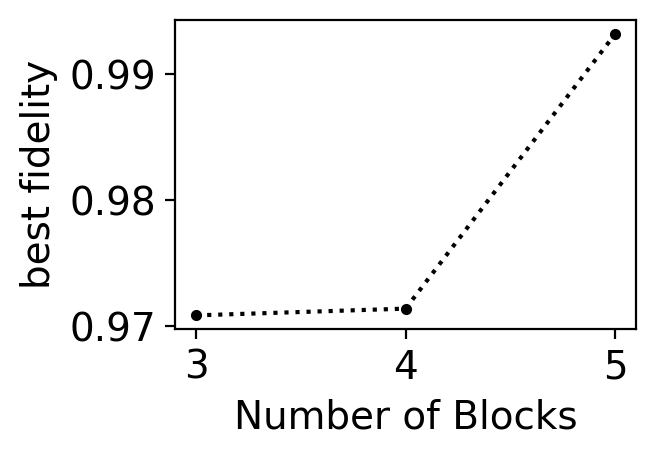

In [11]:
#we can analyze how the best fidelity found depends on the sweep parameter
sweep_analysis.plot_sweep_fidelities(log=False)

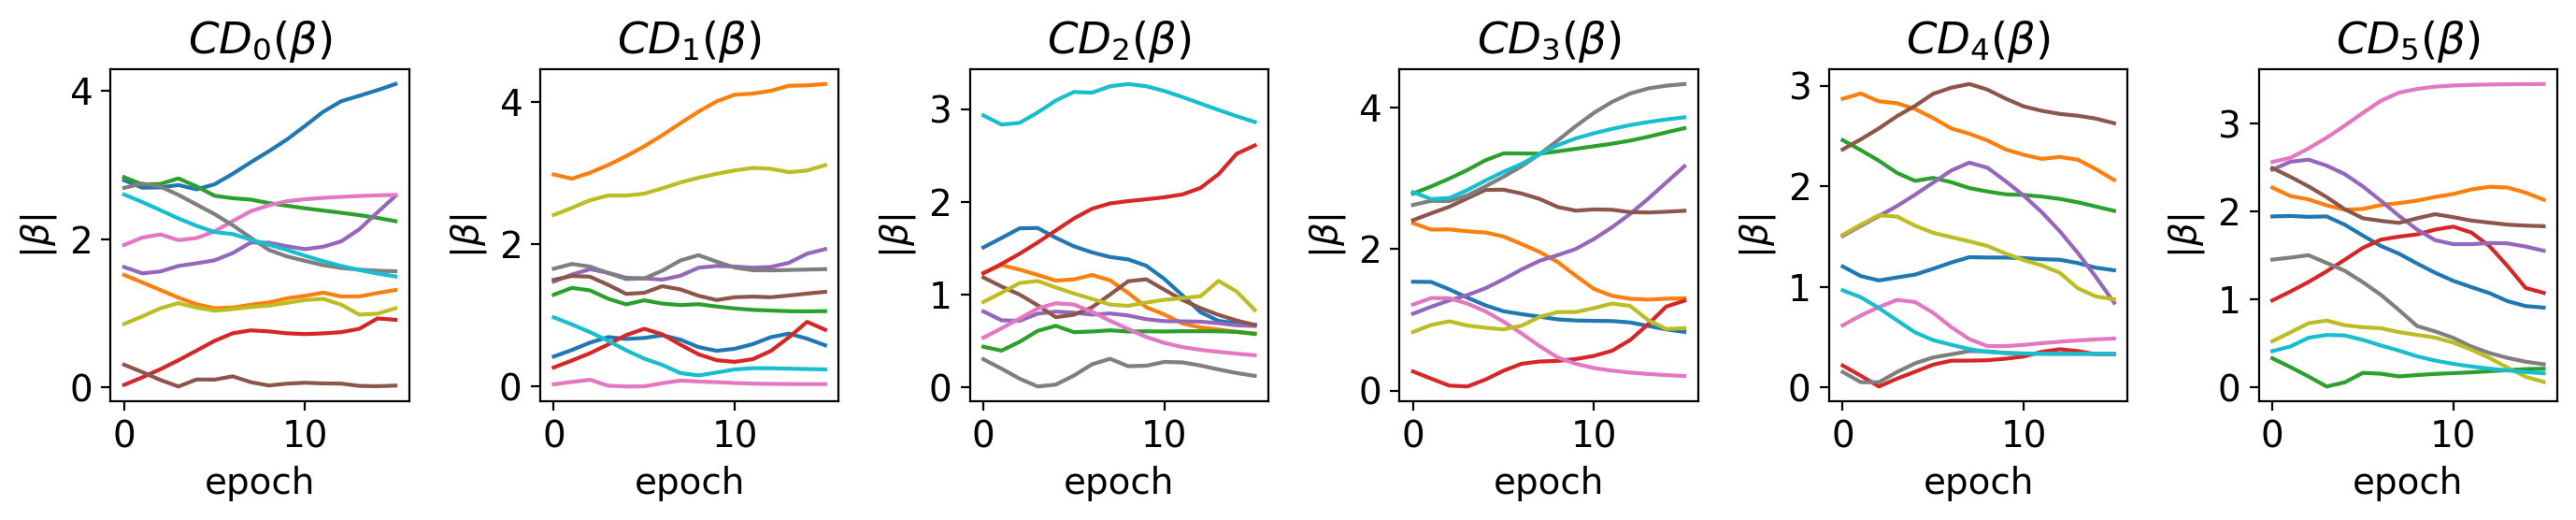

In [12]:
#there are a few other things we can plot. Better data analysis coming soon.
analysis.plot_mag_betas()

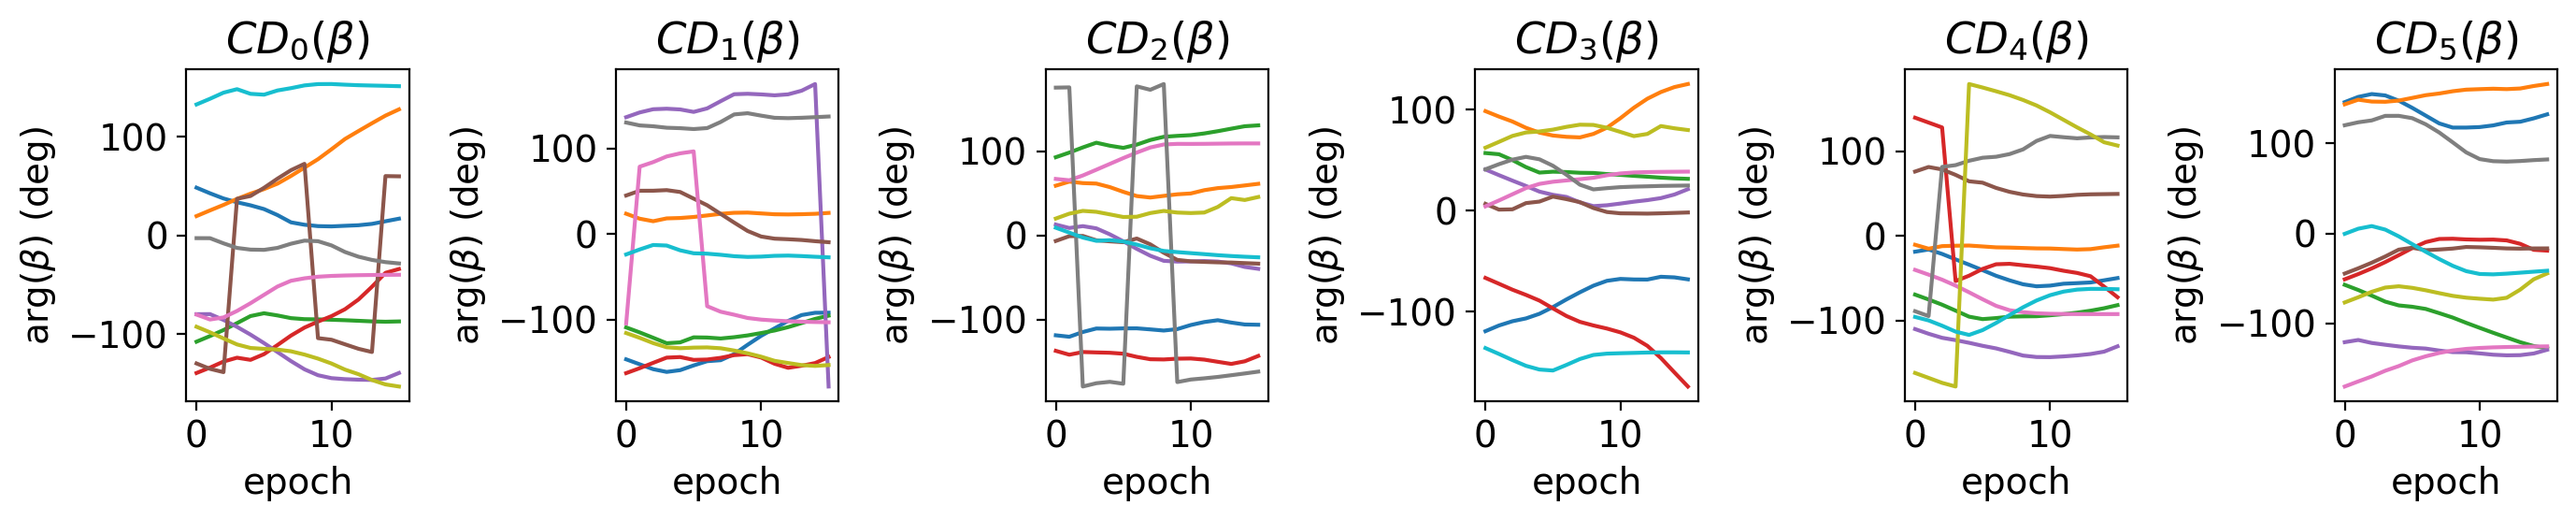

In [13]:
analysis.plot_phase_betas()

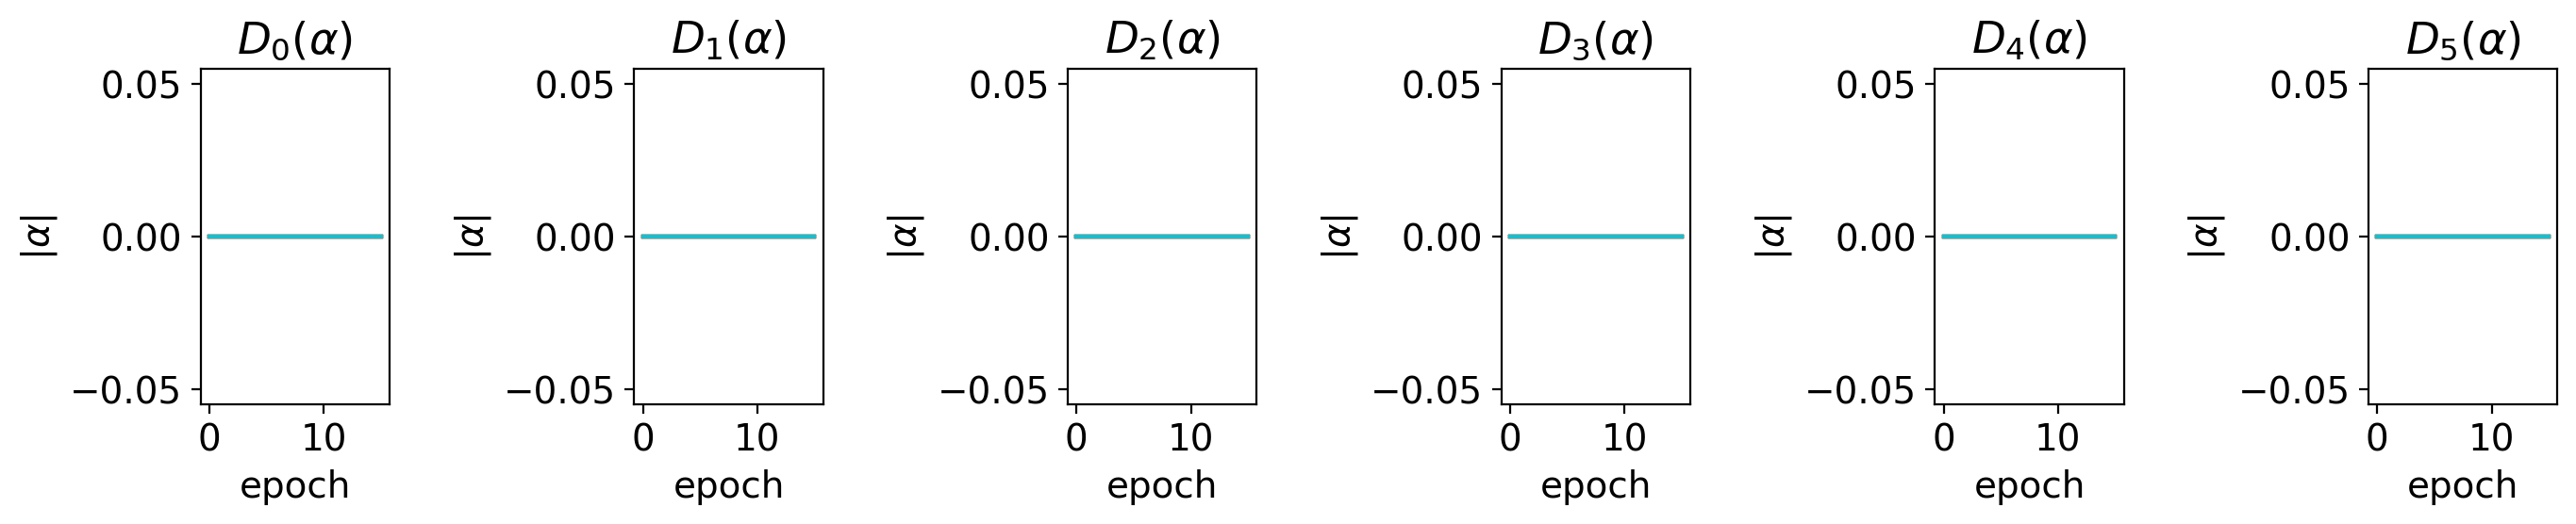

In [14]:
analysis.plot_mag_alphas()

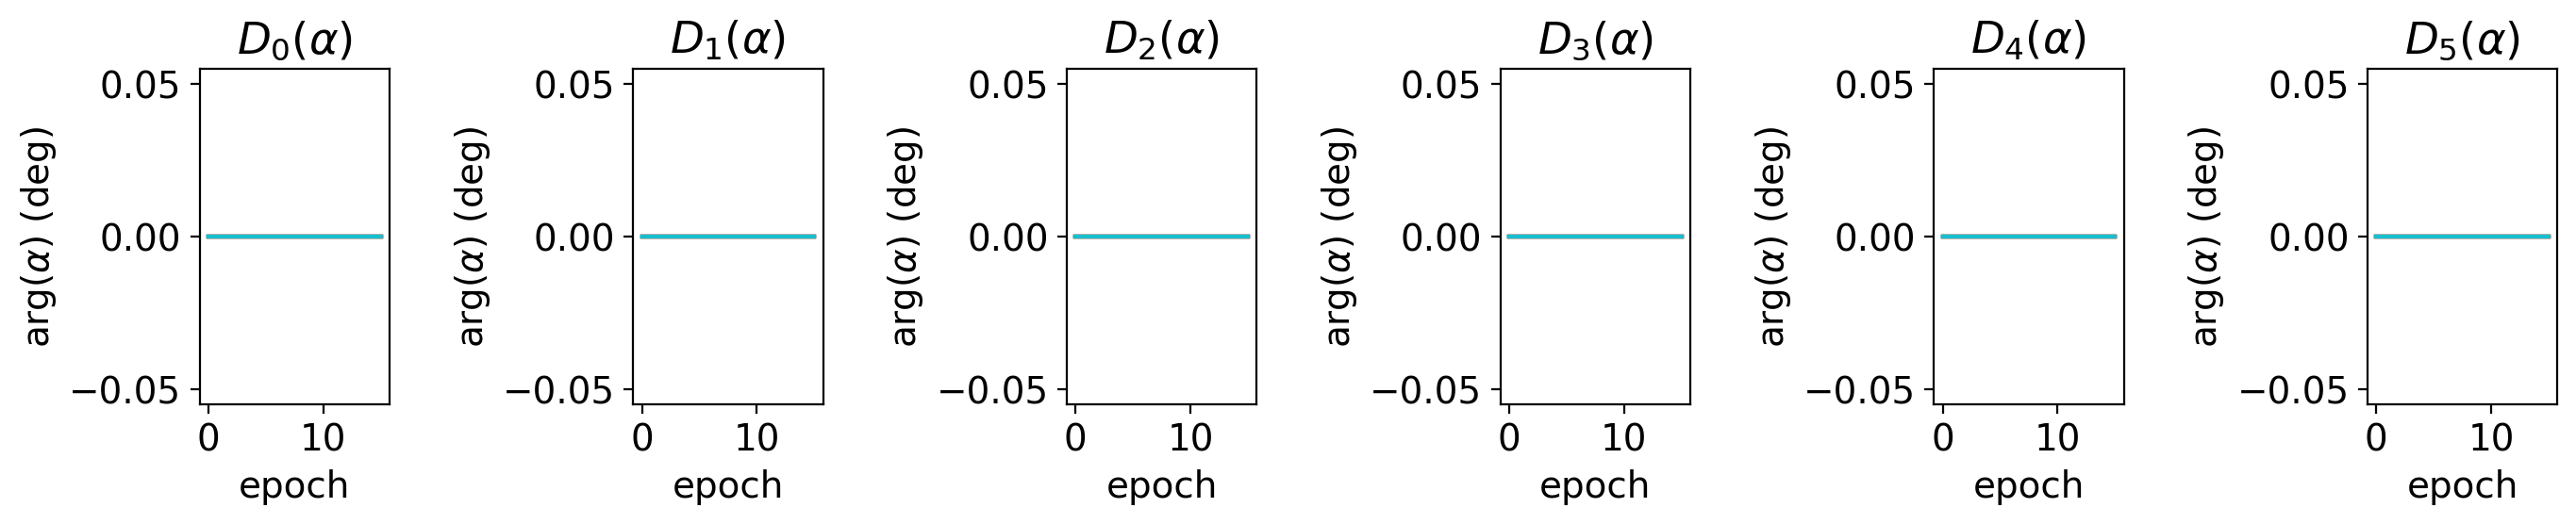

In [15]:
analysis.plot_phase_alphas()

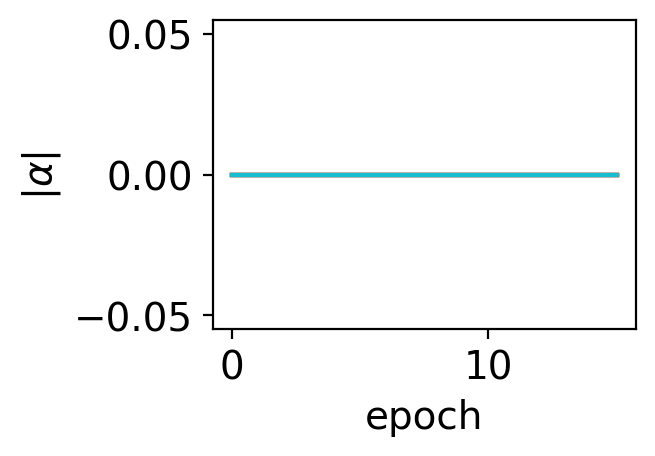

In [16]:
analysis.plot_average_magnitude_alpha()

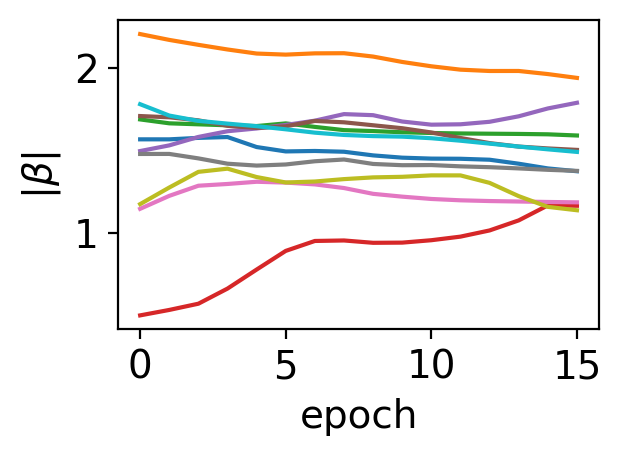

In [17]:
analysis.plot_average_magnitude_beta()